In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

In [3]:
df = pd.read_csv("../data/student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0.5, 1.0, 'Hubungan antara Hours dan Scores')

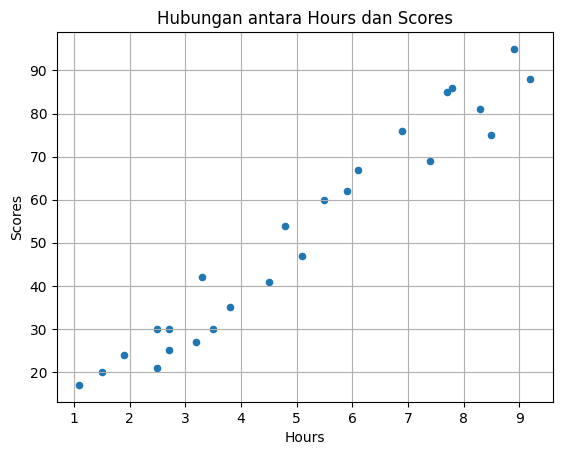

In [7]:
df.plot.scatter(x="Hours", y="Scores")
plt.grid(True)
plt.title("Hubungan antara Hours dan Scores")

### Data Cleaning

##### Duplikat

In [8]:
df.duplicated().sum()

np.int64(0)

##### Missing Values

In [9]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

##### Outlier

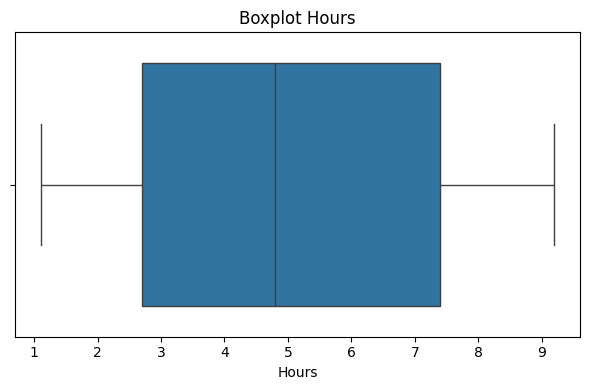

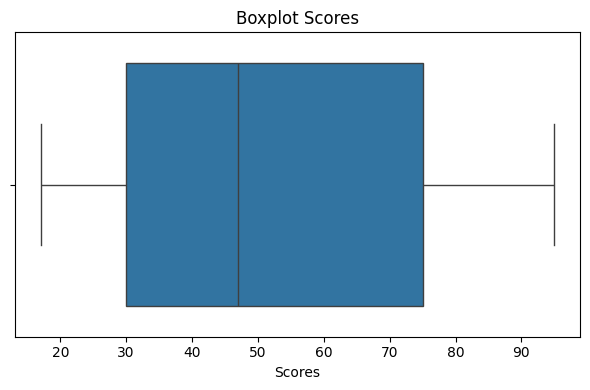

In [10]:
for col in df:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=col).set_title(f"Boxplot {col}")
    plt.tight_layout()
plt.show()

### Split Data

In [11]:
x = df[["Hours"]] 
y = df["Scores"] 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

- 80% data untuk training
- 20% data untuk testing

### Train Model

In [12]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [13]:
intercept = model.intercept_
coef = model.coef_

print(f"Intercept = {intercept}")
print(f"Coef = {coef}")

Intercept = 2.826892353899737
Coef = [9.68207815]


- Jika tidak belajar (0 jam), maka akan mendapat nilai 2.82
- Setiap 1 jam belajar, akan naik sebanyak 9.68

In [14]:
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mean_absolute_error = {mae}")
print(f"mean_squared_error = {mse}")
print(f"root_mean_squared_error = {rmse}")
print(f"r2_score = {r2}")

mean_absolute_error = 3.9207511902099244
mean_squared_error = 18.943211722315272
root_mean_squared_error = 4.352380006653288
r2_score = 0.9678055545167994


r2_score mendekati 1 lebih bagus

In [15]:
df_result = pd.DataFrame({'Actual': y_test, 'Predicted' : y_pred})
df_result

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


Hasil antara actual dan predicted tidak terlalu jauh sehingga bisa disimpulkan bahwa model machine learning berhasil.

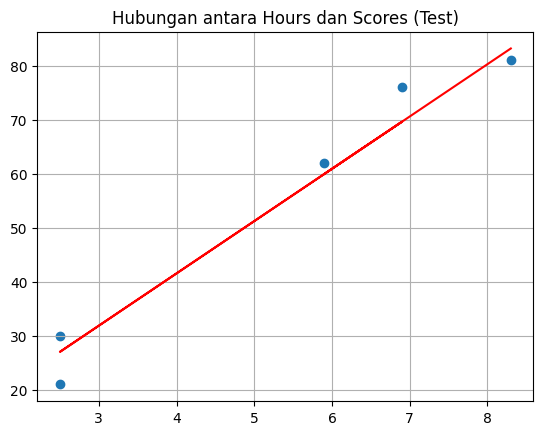

In [16]:
# untuk test

plt.scatter(x=x_test, y=y_test)
plt.title("Hubungan antara Hours dan Scores (Test)")
plt.grid(True)
plt.plot(x_test, model.predict(x_test), c="red")

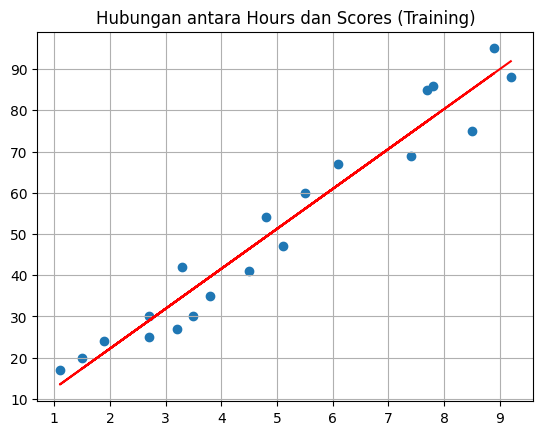

In [17]:
# untuk training

plt.scatter(x=x_train, y=y_train)
plt.title("Hubungan antara Hours dan Scores (Training)")
plt.grid(True)
plt.plot(x_train, model.predict(x_train), c="red")

In [18]:
joblib.dump(model, "model.pkl")

['model.pkl']